# Accreting Black Holes

## 0. GENERAL BACKGROUND

Binary star systems consist of two stars that orbit one another. Depending on the mass of these stars, one or more of them may explode in a supernova and form a black hole late in their lifetime. This is generally the case for stars with initial masses greater than 20 times that of the sun, or 20 solar masses ($M_\odot$). 

In the majority of these binary systems, black hole formation occurs asynchronously. This implies that the binary undergoes a period time where one object is a black hole and one object is still a star. This stage of evolution is called the x-ray binary phase, and the system is referred to as an **x-ray binary**.

Why do we call these systems x-ray binaries? During this evolutionary stage, the black hole accretes matter from its companion star due to its strong gravitational pull. The accretion process heats transferred material through gravitational and frictional forces, which in turn triggers the emission of x-rays. Below is a helpful illustration of this process:

![HMXB_illustration](HMXB_illustration.jpg)

Because the matter surrounding these black holes emits brightly in the x-ray band of the electromagnetic spectrum, x-ray observatories (such as the Chandra Observatory) search for this emission to identify binary systems that house black holes. The brightness, or luminosity, that astronomers observe in these binaries is called the **accretion luminosity**, as it is the luminosity that results from the accretion process of stellar material onto the black hole. These observations help astronomers learn about the properties of these systems and predict their possible courses of evolution. For example, some astronomers are interested in finding systems like these that will eventually form colliding black holes, which can be observed with gravitational wave detections.

In this project, we will take a closer look at how we can predict the luminosity of these black hole systems using computational methods and data from simulations.  Theoretical calculations like these help astronomers target their observations towards certain luminosities so that they can better identify these systems in the sky. These calculations also help astronomers compare their theoretical predictions with observations so that they can better understand if there are flaws in their theoretical or observational methods.

## 1. INTRODUCTION AND DEFINITIONS

### 1.1  Some theoretical background
As it turns out, black holes are not necessarily entirely dark! 

Indeed, black holes that are being feed material are able to emit light by a process that we call **"mass-to-energy conversion"**. In this process, a black hole is able to *accrete* (that is, increase its mass) via an **accretion disk** that transports material from large distances all the way down to the edge of the black hole, near its **event horizon**. By being moved around, the material loses energy, which is released in the form of emitted light. Therefore, the amount of light emitted -- which we call the **accretion luminosity** $L_{\rm acc}$-- must be proportional to the so-called accretion rate of the disk  $\dot{M}_{\rm acc}$. In order to fall into the black hole, the material loses *so much energy*, that this must be released at the expense of the material's own (rest) mass. This process literally converts mass into light!

If we put it into equation form:

$L_{\rm acc} = \eta \dot{M}_{\rm acc}c^2$

where $c$ is the speed of light and $\eta$ is a scale factor which represents the **efficiency of mass-to-energy conversion**.

As black holes evolve and increase their mass via accretion, their efficiency $\eta$ is thought to increase as well (the reasons are beyond the scope of this project, but they have to do with the black hole being spun up as it grows in mass, and spinning black holes are more efficient at converting mass into energy than non-spinning ones). An approximate way to relate the evolving efficiency to the evolving black hole mass is:

$$\eta = 1 - \sqrt{1 - \bigg(\frac{M_{\rm BH}}{3M_{\rm BH,0}}\bigg)^2}$$

Since mass is literally being converted into light, it turns out the the black hole doesn't get to eat all the mass that was originally fed to it from a large distance. Instead, the black hole only accretes the material that **was not** converted into light. Or, in equation form, 

$$ \dot{M}_{\rm BH} = \dot{M}_{\rm acc}(1 - \eta)$$


You will need to use (and understand!) these three equations to carry out the following research project.

### 1.2 Defining your own Python functions
First, we need to write a function that calculates and returns the accretion luminosity of a black hole in a binary system. We need something like the following:

```python
def calc_Lacc(<function arguments>):

  < calculate Lacc using the above formulae >

  return Lacc
```

The parameters being fed to our function are $M_{\rm BH}$, $M_{\rm BH,0}$, and $\dot{M}_{\rm BH}$ (see definitions above). And we need the function to output $L_{\rm acc}$ according to the equation above. Thus we need something like:
```python
def calc_Lacc(Mbh,Mbh0,Mdotbh):

  Lacc = eta * Mdotacc * c**2

  return Lacc
```
where you we need to look up the value of ``c``. But most importantly, we also need to know where ``eta`` and ``Mdotacc`` come from! 

So, a more complete definition of the function is something that may look like:

```python
def calc_Lacc(Mbh,Mbh0,Mdotbh):
  eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2

  return Lacc
```


Now it's your turn to make this function work.

In [ ]:
# define your function in this code cell
# 
def calc_Lacc(Mbh,Mbh0,Mdotbh):
  eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2

  return Lacc

Note that ``eta`` and ``Mdotacc`` are computed from other quantities, so they can be defined as functions themselves! 
Now, try something like this:

```python
def calc_eta( <...>):
  <...>
  return eta

def calc_Mdotacc( <...>):
  <...>
  return Mdotacc


def calc_Lacc( <...>):
  <...>
  Lacc = calc_eta(<...>) * calc_Mdotacc(<...>) * c**2

  return Lacc
```

In [ ]:
# define your function in this code cell
# ...

c = 2.99792458e10 # in cm/s
Msun = 1.989e33 # in g
year = 3.156e7 # in sec

def calc_Lacc(Mbh,Mbh0,Mdotbh):
  eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2

  return Lacc

To test your function, use it to calculate the accretion luminosity for a system with $M_{\rm BH} = 11.645$ M$_{\odot}$, $M_{\rm BH,0} = 11.611$ M$_{\odot}$, $\dot{M}_{\rm BH} = 3.026\times10^{-7} M_{\odot}$ yr$^{-1}$. 
What is the value of $L_{\rm acc}$? (The quantity $M_\odot=1.98847\times10^{33}$ gr corresponds to the mass of the Sun and is referred to as a "solar mass")

In [ ]:
# test your function here
# ...

calc_Lacc(11.645* Msun,11.611*Msun,3.026e-7*Msun/year)

1.0463766110464895e+39

### 1.3 Reading-in data files
For this project, we are going to use data generated by a general theoretical modelling tool called COSMIC. This software generales CSV files (comma separated values) that we can read using pandas.



``` python
import pandas as pd
df1 = pd.read_csv('cosmic_data_1.csv')
print(df1.columns)
```


In [ ]:
# copy the snipet above into this code cell
# ...
import pandas as pd
df1 = pd.read_csv('cosmic_data_1.csv')
print(df1.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


Some of the relevant columns are the time ``tphys``, the masses of the primary and secondary **when they were still stars** are  ``mass0_1`` and ``mass0_2`` respectively, and the masses of the primary and secondary  at the current time ``tphys`` are ``mass1`` and ``mass2``, respectively. The rate of change of mass (i.e., the "accretion rate") of the primary and secondary are ``deltam_1`` and ``deltam_2``, respectively.

### 1.4 Plotting data

Using what you have learned about matplotlib, try plotting any two columns contained in the datafile ``cosmic_data_1.csv``. For instance, you can plot the masses of the primary and secondary as a function of time:

```python
import matplotlib.pyplot as plt

plt.plot(df1['tphys'],df1['mass_1'])
plt.plot(df1['tphys'],df1['mass_2'])
```




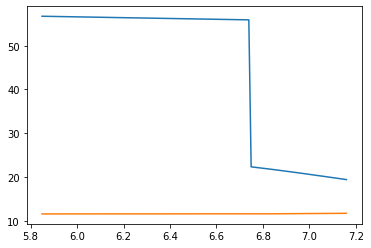

In [ ]:
# try to make a plot here
# ...
import matplotlib.pyplot as plt

plt.plot(df1['tphys'],df1['mass_1'])
plt.plot(df1['tphys'],df1['mass_2'])

## 2. YOUR TURN TO DO RESEARCH!

### 2.1 Use  what you have learned so far

#### 2.2.1 Modify your functions
The value of $\eta$ as defined above becomes imaginary if $M_{\rm BH}>3M_{\rm BH,0}$. But in practice, this equation stops being valid much earlier. Specifically, according to black hole theory $\eta$ cannot exceed a value of 0.42 (which takes place for a so-called **maximally spinning black hole**, for which the event horizon rotates at the speed of light!). Thus, $\eta$ is taken to be $0.42$
for all black hole masses of $\sqrt{6}M_{BH,0}$ and above (you cannot spin faster than a maximally spinning black hole!).

So, you need to ammend your old function below to capture this new condition on $\eta$:


In [ ]:
# code an ammended function here that does not allow eta to be larger than 0.42
#...

def calc_Lacc(Mbh,Mbh0,Mdotbh):
  if (Mbh <= 6**0.5 * Mbh0):
      eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  else:
    eta = 0.42
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2

  return Lacc



Another ammendment that we need to implement is what called  **bolometric correction** to the luminosity. A bolometric correction is a multiplicative factor that accounts for differences between the visible luminosity that we observe and the true brightness of the observed source. For binaries with accreting black holes, this correction is $0.8$. Copy and paste your old function below, and then multiply your final accretion luminosity by this factor before returning it. 

In [ ]:
# code an ammended function here that takes the bolometric correction into account
#...

def calc_Lacc(Mbh,Mbh0,Mdotbh):
  if (Mbh <= 6**0.5 * Mbh0):
      eta = 1 - (1 - (Mbh/3/Mbh0)**2)**0.5
  else:
    eta = 0.42
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2
  Lacc *= 0.8
    
  return Lacc



What is the value of $L_{\rm acc}$ for the same values as above ( $M_{\rm BH} = 11.645$ M$_{\odot}$, $M_{\rm BH,0} = 11.611$ M$_{\odot}$, $\dot{M}_{\rm BH} = 3.026\times10^{-7} M_{\odot}$ yr$^{-1}$) now that you have ammended your function?

In [ ]:
# test your ammended function here
# ...

calc_Lacc(11.645* Msun,11.611*Msun,3.026e-7*Msun/year)

8.371012888371916e+38

#### 2.2.2 Apply your functions to datasets

We want to apply your function ``calc_Lacc`` to the data frame ``df1`` that contains the dataset ``cosmic_data_1.csv``. 

Since the secondary is the accreting black hole, the parameters we need are ```mass_2``` and ```deltam_2```. One way we can acquire luminosity information is to loop through the dataframe, row by row, and calculate the luminosity at each time step using our function.

First, write a ```for``` loop that goes through each row of the data frame and applies your luminosity function at each iteration. We will try the pandas function ```iterrows()```.* 

For example, the following loop print out the value of ```mass_2``` for each and every row in the data frame alongside the initial value of ```mass_2```

```python
for index,row in df1.iterrows():
    print(row['mass_2'],df1['mass_2'][0])
```

Now try it yourself:

In [ ]:
# Write a for loop here
# ...
for index,row in df1.iterrows():
    print(row['tphys'],row['mass_2'])

5.849342201266905 11.611779387990982
5.859342201266905 11.611779801850762
5.869342201266905 11.611780221423343
5.879342201266905 11.611780646810866
5.8893422012669046 11.611781078117533
5.899342201266904 11.611781515449646
5.909342201266904 11.611781958915634
5.919342201266904 11.61178240862611
5.929342201266904 11.611782864693888
5.939342201266904 11.611783327234026
5.949342201266902 11.611783796363854
5.959342201266903 11.611784272203035
5.969342201266903 11.611784754873565
5.979342201266903 11.611785244499831
5.989342201266902 11.611785741208635
5.999342201266903 11.611786245129217
6.009342201266903 11.611786756393304
6.019342201266903 11.61178727513512
6.029342201266903 11.611787801491436
6.039342201266901 11.611788335601563
6.049342201266901 11.611788877607417
6.059342201266903 11.611789427653497
6.069342201266903 11.611789985886938
6.0793422012669005 11.611790552457506
6.0893422012669 11.611791127517614
6.0993422012669 11.611791711222356
6.1093422012669 11.611792303729464
6.11934

You can operate functions on each value of ``mass_2``. For instance, what if you want to compute ``mass_2`` to the fourth power? You can print it out like this:
```python
for index,row in df1.iterrows():
    print(row['mass_2']**4)
```
Instead of printint the result to the screen, you can save them into an array instead!
```python
import numpy as np
result = np.zeros(len(df1))
for index,row in df1.iterrows():
    result[index]=row['mass_2']**4
print(result)
```

Now it is your turn to try operating functions on the data frame

In [ ]:
# apply functions to df1 here
# ...

import numpy as np
from math import sin

result = np.zeros(len(df1))
for index,row in df1.iterrows():
    result[index]=sin(row['mass_2']**3)
print(result)

[ 0.90979593  0.9098654   0.9099358   0.91000716  0.91007947  0.91015277
  0.91022707  0.91030239  0.91037874  0.91045614  0.91053461  0.91061417
  0.91069483  0.91077663  0.91085957  0.91094368  0.91102897  0.91111547
  0.9112032   0.91129219  0.91138244  0.91147399  0.91156685  0.91166105
  0.91175662  0.91185357  0.91195193  0.91205173  0.91215298  0.91225572
  0.91235997  0.91246576  0.9125731   0.91268203  0.91279258  0.91290476
  0.91301861  0.91313416  0.91325143  0.91337045  0.91349125  0.91361386
  0.9137383   0.91386461  0.91399281  0.91412293  0.914255    0.91438905
  0.9145251   0.9146632   0.91480335  0.9149456   0.91508998  0.9152365
  0.91538519  0.91553609  0.91568922  0.91584461  0.91600227  0.91616224
  0.91632454  0.91648919  0.91665621  0.91682563  0.91699745  0.9171717
  0.9173484   0.91752756  0.91770919  0.9178933   0.9180799   0.91826899
  0.91846058  0.91865467  0.91885125  0.91905032  0.91925187  0.91945589
  0.91966235  0.91987125  0.92008254  0.92029621  0.9

Now, do this for the function ``calc_Lacc`` and save your calculated luminosities in an array. Print your final array of luminosities to check that they are reasonable. Reasonable luminosities should fall between $10^{30}$ and $10^{45}$ (the units are erg s$^{-1}$).


In [ ]:
# compute Lacc for the entire data frame using iterrows
# ...

import numpy as np
Lacc_array = np.zeros(len(df1))
for index,row in df1.iterrows():
    Lacc_array[index]= calc_Lacc(row["mass_2"]*Msun,row["mass0_2"]*Msun,row["deltam_2"]*Msun/year)
print(Lacc_array)

[7.98811035e+34 8.09818683e+34 8.21022958e+34 8.32427831e+34
 8.44037348e+34 8.55855622e+34 8.67886842e+34 8.80135266e+34
 8.92605220e+34 9.05301104e+34 9.18227382e+34 9.31388589e+34
 9.44789325e+34 9.58434253e+34 9.72328100e+34 9.86475652e+34
 1.00088175e+35 1.01555130e+35 1.03048925e+35 1.04570059e+35
 1.06119036e+35 1.07696365e+35 1.09302556e+35 1.10938124e+35
 1.12603585e+35 1.14299456e+35 1.16026256e+35 1.17784502e+35
 1.19574712e+35 1.21397401e+35 1.23253080e+35 1.25142257e+35
 1.27065433e+35 1.29023105e+35 1.31015757e+35 1.33043866e+35
 1.35107896e+35 1.37208298e+35 1.39345506e+35 1.41519936e+35
 1.43731986e+35 1.45982027e+35 1.48270408e+35 1.50597447e+35
 1.52963432e+35 1.55368614e+35 1.57813208e+35 1.60297385e+35
 1.62821270e+35 1.65384936e+35 1.67988403e+35 1.70631628e+35
 1.73314507e+35 1.76036859e+35 1.78798433e+35 1.81598890e+35
 1.84437805e+35 1.87314655e+35 1.90228814e+35 1.93179548e+35
 1.96166000e+35 1.99187190e+35 2.02241998e+35 2.05329163e+35
 2.08447268e+35 2.115947

Now that we have the accretion luminosity data for our binary, let's plot it to see how the system's emission changes over time. Using matplotlib, make a time series plot using the ```tphys``` column from the simulation output along with your array of luminosities. Make sure to properly label your plot!B *Hint: Use a log scale when plotting your luminosities so that you can better visualize the emission behavior.*

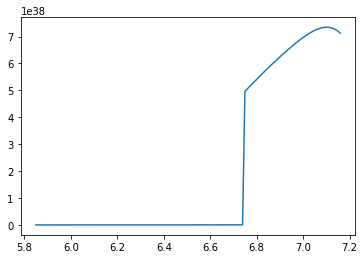

In [ ]:
# use matplotlib to plot the accretion luminosity as a function of time
# ...
plt.plot(df1['tphys'],Lacc_array)

One question researchers might ask is if a given binary system is observable. For a system to be observed by an x-ray observatory, it must reach a maximum luminosity above an observable threshold. Let's take our observable threshold to be $10^{37} erg$ $s^{-1}$, which is a common threshold used for the Chandra Observatory. Using your calculations, find the maximum luminosity of your biBnary system. Is it observable?

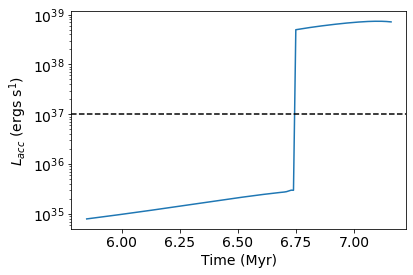

In [ ]:
# plot again here and check if this binary system is observable (Hint: make the y-axis logarithmic in scale)
# ...
plt.plot(df1['tphys'],Lacc_array)
plt.xlabel("Time (Myr)", fontsize=14)
plt.ylabel("$L_{acc}$ (ergs s$^{1}$)", fontsize=14)
plt.axhline(1.0e37, linestyle="--", color="black")
plt.tick_params("both", labelsize=14)
plt.yscale('log')

### 2.2 Expand on  what you have learned so far

As it turns out, looping over dataframes using ```iterrows()``` is actually pretty slow. In the following, we will try an alternative method that we may call **"the array method**.

As an example, consider the following function ```func(y,a)```, where ```y``` is the independent variable and ```a``` is an additional parameter. Note that we define an **internal** variable ```b``` inside the function.

```python
from math import sin

def func(y,a):
    if (abs(a) < 1):
        b = 1
    else:
        b  = 2

    return sin(y/a)**b
```

Now you have multiple values of ```y``` (as you do values of mass in ```df1``` above) and **also** multiple value of ```a```:

```python
y = np.linspace(0,10,100)
a = np.random.random(100)

```
You can repeat the loop method to evaluate  ```func``` for all these values of ```y``` and ```a```:

```python
for index in range(len(y)):
    result[index] = func(y[index],a[index])
```
But, as mentioned before, this approach is very slow. ```numpy```, however, should allow you to operate the function directly on the arrays and do something like:

```python
result = func(y,a)
```
but that will not work. Do you know why?

In [ ]:
# test that the numpy operation will not work off the bat
#...
from math import sin

def func(y,a):
    if (abs(a) < 1):
        b = 1
    else:
        b  = 2

    return sin(y/a)**b
y = np.linspace(0,10,20)
a = np.random.random(20)
#result = func(y,a)


We will solve this problem using what you learned about **array slicing**. For example, let's say I have two arrays of the same size called ```x``` and ```y```. If want to know which values of ```x``` are less than their corresponding values in ```y```, you can write:

``` python
x_lower_values = x < y
```
The quantity ```x_lower_values``` is a **boolean array** or an array of zeros and ones --or yeas and nays-- telling your where x is less than y (True) and when x is not less than y (False). Similarly, there is the ```numpy``` function ```where()```. 

Now rewrite the example function as:

```python
def func(y,a):
    b = np.ones(len(a))
    a_higher_values = a > 1

    b[a_higher_values] = 2

    return np.sin(y/a)**b
```

Alternatively, if you want to use ```where```, you could write:

```python
def func(y,a):
    b = np.ones(len(a))
    b = np.where(a > 1,2,1)
    return np.sin(y/a)**b
```
Make sure these two functions work

In [ ]:
# code here
#...
def func(y,a):
    b = np.ones(len(a))
    a_higher_values = a > 1

    b[a_higher_values] = 2

    return np.sin(y/a)**b
print(func(y,a))

def func(y,a):
    b = np.ones(len(a))
    b = np.where(a > 1,2,1)
    return np.sin(y/a)**b
print(func(y,a))

[ 0.          0.72249766  0.78075766  0.70898435  0.71885156 -0.77676599
 -0.8698916   0.08286251  0.40163402  0.06231214 -0.99990929  0.28789052
 -0.21381493 -0.32425455 -0.97565754  0.41386193  0.05993288  0.65454045
 -0.04183744 -0.96353918]
[ 0.          0.72249766  0.78075766  0.70898435  0.71885156 -0.77676599
 -0.8698916   0.08286251  0.40163402  0.06231214 -0.99990929  0.28789052
 -0.21381493 -0.32425455 -0.97565754  0.41386193  0.05993288  0.65454045
 -0.04183744 -0.96353918]


Now, ammend your ```calc_Lacc``` function once more such that you can call it in just one line
```python
def calc_Lacc_np(Mbh,Mbh0,Mdotbh):
    ...
```

In [ ]:
# code your improved function here
#...
def calc_Lacc_np(Mbh,Mbh0,Mdotbh):
  eta = np.where(Mbh > 6.**0.5*Mbh0, 0.42, 1. - (1. - (Mbh/(3*Mbh0))**2)**0.5)
  Mdotacc = Mdotbh/(1- eta)
  Lacc = eta * Mdotacc * c**2
  Lacc *= 0.8
    
  return Lacc

Apply your new and improved function to the same data set above. You should now only need one line of code to calculate your array of accretion luminosities. Print your final array of luminosities to check that they are reasonable. *Hint: you may need to create an array for $M_{BH,0}$ that is the same length as your arrays for $M_{BH}$ and $\dot M_{BH}$ in order to pass it to your function.*

In [ ]:
# code here
# ...
Lacc_array_np = calc_Lacc_np(df1["mass_2"]*Msun,df1["mass0_2"]*Msun,df1["deltam_2"]*Msun/year)

Plot the accretion luminosities you obtained with the ```for``` loop method as well as those you obtained with the array method. They should appear to be the same line on your plot! Make sure to properly label your plot.

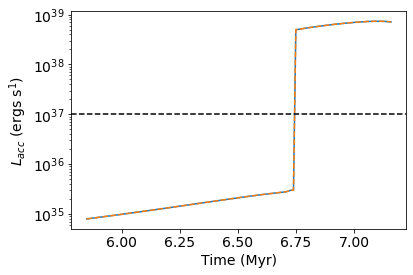

In [ ]:
# code here
# ...
plt.plot(df1["tphys"],Lacc_array,ls='-')
plt.plot(df1["tphys"],Lacc_array_np,ls='--')
plt.xlabel("Time (Myr)", fontsize=14)
plt.ylabel("$L_{acc}$ (ergs s$^{1}$)", fontsize=14)
plt.axhline(1.0e37, linestyle="--", color="black")
plt.tick_params("both", labelsize=14)
plt.yscale('log')

Copy and paste your pieces of code that run your different luminosity functions below. Import the python ```time``` module and use the ```time()``` function to determine the runtime of each code segment. Print both runtimes to compare them.

In [ ]:
# code here
# ...
import time

t1 = time.time()

Lacc = []
for i, row in df1.iterrows():
    Lacc.append(calc_Lacc(row["mass_2"]*Msun,row["mass0_2"]*Msun,row["deltam_2"]*Msun/year))    

t2 = time.time()

Lacc_np = calc_Lacc_np(df1["mass_2"]*Msun, df1["mass0_2"]*Msun, df1["deltam_2"]*Msun/year)

t3 = time.time()

print("For loop time: ", t2 - t1,"seconds")
print("Numpy time: ", t3 - t2,"seconds")

For loop time:  0.016406774520874023 seconds
Numpy time:  0.0031671524047851562 seconds


Even though the difference in runtimes may seem small, it is actually quite noticeable when applied to many systems. Calculate how long each method would take to analyze the luminosities of a full population of 50,000 binaries. What's the computing time in hours?

In [ ]:
# code here
# ...
hour_in_seconds = 3600
total_time  = 50000*(t2 - t1)/hour_in_seconds
total_time_np = 50000*(t3 - t2)/hour_in_seconds
print("For loop time for 50,000 binaries: ", total_time,"hours")
print("Numpy time for 50,000 binaries: ", total_time_np,"hours")

For loop time for 50,000 binaries:  0.19294354650709364 hours
Numpy time for 50,000 binaries:  0.031905041800604925 hours


Now, suppose we run a total of 10 different simulations, and need to analyze the luminosities of all systems in each simulation. How long does each method take to complete these calculations? Were the improvements to your luminosity function worth it?

In [ ]:
# code here
# ...
total_time  = 10*50000*(t2 - t1)/hour_in_seconds
total_time_np = 10*50000*(t3 - t2)/hour_in_seconds
print("For loop time for 50,000 binaries: ", total_time,"hours")
print("Numpy time for 50,000 binaries: ", total_time_np,"hours")

For loop time for 50,000 binaries:  2.2787186834547253 hours
Numpy time for 50,000 binaries:  0.4398822784423828 hours


## 3. BONUS RESEARCH PROJECT

The file ```cosmic_data_1.csv``` is actually a very small portion of a full simulation output file. Normally, researchers want information about the entire evolution of a binary system so that characteristics of its behavior, such as its merge status, emission properties, etc. are placed in context with one other. This allows correlations to be drawn between evolutionary behaviors and facilitates a more complete understanding of how binary evolution works.

Read-in the simulation data file ```cosmic_data_2.csv```, also located in this project folder, and store it as a ```pandas``` dataframe (it may take a couple of minutes to upload). Open the file and examine its format, including column titles, the number of rows, etc. 

```python
df2 = pd.read_csv('cosmic_data_2.csv')
print(df2.columns)
```

In [ ]:
# read-in your data frame here
df2 = pd.read_csv('cosmic_data_2.csv')
print(df2.columns)
print(len(df2),len(df1))

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')
27515 132


This file is clearly far more massive than the previous one - and it is still a reduced version of the full simulation output! 

The bonus portion of this project involves identifying the x-ray binary phase of the system and applying our luminosity function to the appropriate subset of the extended data file. 

First, we need to identify when the x-ray binary phase begins. We can do this by finding the timestep when the first black hole is formed, which is recorded in the ```kstar_1``` and ```kstar_2``` columns of the data file. If ```kstar_1``` or ```kstar_2``` equals $14$, then that respective object is a black hole. The x-ray binary phase begins when the first black hole's accretion rate becomes greater than zero.

We will use the ```numpy.where()``` function to identify **3 separate instances** of interest in the evolution of this binary:
* The time (or array index) at which one of the two stars first becomes a black hole.
* The time (or array index) at which the first black hole to form starts to accrete (gain) mass.
* The time (or array index) at which the first black hole to form ceases to accrete mass.

Write a piece of code that identifies the timestep or index of the data file at which each object in the binary becomes a black hole. Store each index as a variable. Then compare the indices or timesteps you found and determine which black hole formed first. Do both Object 1 and Object 2 become black holes?

In [ ]:
# Use np.where() to find where in the dataframe the *first time* the quantities kstar_1 and kstar_2 are equal to 14
# ...
ind0_1 = np.where(df2["kstar_1"] == 14)[0][0]
ind0_2 = np.where(df2["kstar_2"] == 14)[0][0]
print("kstar_1 becomes 14 for the first time at index ",ind0_1)
print("kstar_2 becomes 14 for the first time at index ",ind0_2)
if (ind0_1 < ind0_2):
    print("Object 1 becomes a black hole before Object 2")
else:
    print("Object 2 becomes a black hole before Object 1")

kstar_1 becomes 14 for the first time at index  128
kstar_2 becomes 14 for the first time at index  12
Object 2 becomes a black hole before Object 1


Now, identify the indices that correspond to the beginning and end of the mass accretion phase. This is the **x-ray binary phase**. Do both Object 1 and Object 2 experience a period of mass accretion?

In [ ]:
# code here
# ...
ind1_2 = np.where(df2["deltam_2"] > 0)[0][0] # second object's accretion phase begins
ind2_2 = np.where(df2["deltam_2"] > 0)[0][-1] # second object's accretion phase ends

print("Object 2: Mass accretion phase begins at index ",ind1_2,", and ends at index ",ind2_2)

Object 2: Mass accretion phase begins at index  12 , and ends at index  127


Create 3 variables $M_{BH}$, $M_{BH,0}$ and $\dot{M}_{BH}$, and using ```if``` statements, assign to them the corresponding columns of Object 1 or Object 2 **during x-ray binary (mass accretion) phase**. Hint: use indexing to select only the relevant part of each column

In [ ]:
# code here
# ...
M_BH = df2["mass_2"][ind1_2:ind2_2+1]
M_BH0 = df2["mass0_2"][ind1_2:ind2_2+1]
Mdot_BH = df2["deltam_2"][ind1_2:ind2_2+1]

Using your numpy-compatible function, calculate the accretion luminosity of the binary during the x-ray binary phase, and print the resulting array of luminosities. Determine if this system is observable.

In [ ]:
# code here
# ...
Lacc_np = calc_Lacc_np(M_BH*Msun , M_BH0*Msun, Mdot_BH*Msun/year)
print(Lacc_np.max())
if (Lacc_np.max() > 1e37):
    print("The system is observable!")
                      

6.4019797359638224e+38
The system is observable!


As a last step, compare your new luminosities to those you found above with the ```cosmic_data_1.csv``` data set. Use ```matplotlib``` to plot a time series of the binary emission over time, and label your plot accordingly. *Hint: you will need to apply the same cuts to the ```tphys``` column of ```cosmic_data_2.csv``` that you applied to your luminosity input parameters in order to plot your luminosities.*

What are some similarities and differences between the emission of the first and second binary system?

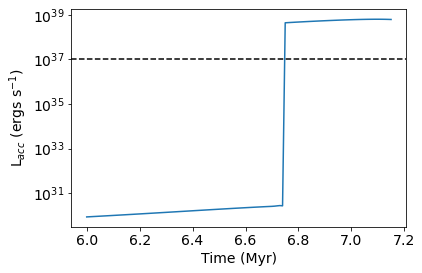

In [ ]:
# code here
# ...
time = df2["tphys"][ind1_2:ind2_2+1]

plt.plot(time, Lacc_np, "-")
plt.axhline(1.0e37, linestyle="--", color="black")
plt.xlabel("Time (Myr)", fontsize=14)
plt.ylabel("L$_{acc}$ (ergs s$^{-1}$)", fontsize=14)
plt.tick_params('both', labelsize=14)
plt.yscale("log")

Congratulations, you have completed this project! I hoped you have learned some new information about x-ray binary systems, and have also sharpened your coding skills by experimenting with computational methods commonly used in research. If you are looking for more challenges, ask Camille and she will happily give you some!